# Predicting Programming Languages From NASA's README's

### Imports

In [23]:
import wrangle as w

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import matplotlib.style as style 
style.available
style.use('seaborn-talk') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

### Acquire

In [2]:
#acquire the data
df = w.get_nasa()
df.head(10)

,repo,language,readme_contents
0,nasa/cumulus,JavaScript,# Cumulus Framework\n\n[![npm version](https:/...
1,nasa/openmct,JavaScript,# Open MCT [![license](https://img.shields.io/...
2,nasa/astrobee_android,Java,# Astrobee Robot Software - Android submodule\...
3,nasa/astrobee,C++,# Astrobee Robot Software\n\n### About\n\n<p>\...
4,nasa/earthdata-search,JavaScript,# [Earthdata Search](https://search.earthdata....
5,nasa/daa-displays,TypeScript,# DAA-Displays: A Toolkit for the Analysis of ...
6,nasa/code-nasa-gov,CSS,# CODE.NASA.GOV\n\n[![Build Status](https://tr...
7,nasa/cumulus-orca,Python,## Clone and build Operational Recovery Cloud ...
8,nasa/dorado-scheduling,Python,# Dorado observation planning and scheduling s...
9,nasa/cFS,CMake,[![Build Status](https://travis-ci.com/nasa/cF...


In [3]:
#shape of the dataset
df.shape

(291, 3)

In [4]:
# columns and data type summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             291 non-null    object
 1   language         275 non-null    object
 2   readme_contents  283 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [5]:
#summary stats
df.describe()

,repo,language,readme_contents
count,291,275,283
unique,291,36,282
top,nasa/prog_models,Python,Installation\n============\n\nRequirements\n~~...
freq,1,67,2


In [7]:
#check out nulls in dataset
df.isna().sum()

repo                0
language           16
readme_contents     8
dtype: int64

In [43]:
#check out the percentage of each programming language
df.language.value_counts(normalize=True) * 100

Python              24.444444
C                   17.037037
C++                 13.703704
JavaScript           7.777778
Java                 4.814815
HTML                 4.814815
Jupyter Notebook     4.074074
MATLAB               3.333333
Fortran              2.222222
CSS                  1.851852
Ruby                 1.851852
PHP                  1.111111
TypeScript           1.111111
Perl                 1.111111
IDL                  1.111111
R                    1.111111
Shell                1.111111
CMake                0.740741
Matlab               0.740741
HCL                  0.370370
FORTRAN              0.370370
GLSL                 0.370370
Emacs Lisp           0.370370
Clojure              0.370370
C#                   0.370370
Common Lisp          0.370370
Haskell              0.370370
Limbo                0.370370
Mathematica          0.370370
Prolog               0.370370
OCaml                0.370370
OpenEdge ABL         0.370370
TeX                  0.370370
SCSS      

[]

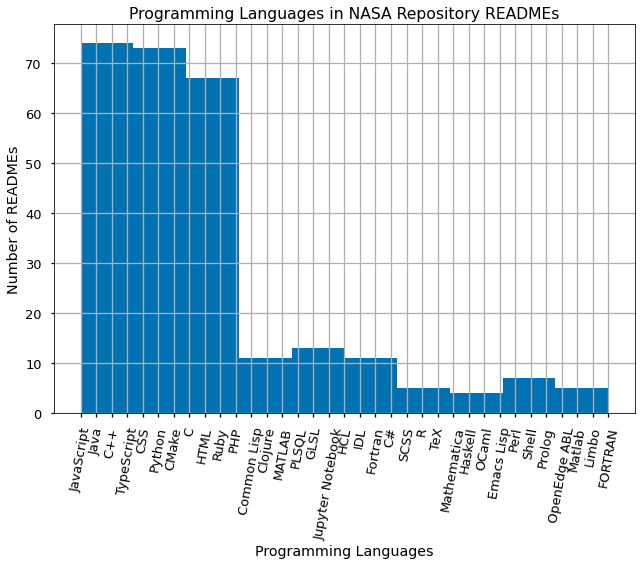

In [41]:
#histograms of different programming languages used
df.language.hist()
plt.title('Programming Languages in NASA Repository READMEs')
plt.xlabel('Programming Languages')
plt.ylabel('Number of READMEs')
plt.xticks(rotation = 80)
plt.plot()

#### add acquire summary

### Prepare

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 290
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             270 non-null    object
 1   language         270 non-null    object
 2   readme_contents  270 non-null    object
dtypes: object(3)
memory usage: 8.4+ KB


In [11]:
df.readme_contents[0]

"# Cumulus Framework\n\n[![npm version](https://badge.fury.io/js/%40cumulus%2Fapi.svg)](https://badge.fury.io/js/%40cumulus%2Fapi)\n[![Coverage Status](https://coveralls.io/repos/github/nasa/cumulus/badge.svg?branch=master)](https://coveralls.io/github/nasa/cumulus?branch=master)\n\n## 📖 Documentation\n\n- Documentation for the latest [released version](https://nasa.github.io/cumulus).\n- Documentation for the [unreleased work](https://nasa.github.io/cumulus/docs/next/cumulus-docs-readme).\n\n## More Information\n\nFor more information about this project of more about NASA's Earth Observing System Data and Information System (EOSDIS) and its cloud work, please contact [Katie Baynes](mailto:katie.baynes@nasa.gov) or visit us at https://earthdata.nasa.gov.\n\n# 🔨 Development\n\nThe Cumulus core repo is a [monorepo](https://en.wikipedia.org/wiki/Monorepo)\nmanaged by [Lerna](https://lerna.js.org/). Lerna is responsible for installing\nthe dependencies of the packages and tasks that belong

In [12]:
df.readme_contents = df.readme_contents.apply(w.clean)

In [13]:
df.head()

,repo,language,readme_contents
0,nasa/cumulus,JavaScript,cumulus framework npm versionhttpsbadgefuryioj...
1,nasa/openmct,JavaScript,open mct licensehttpsimgshieldsiobadgelicensea...
2,nasa/astrobee_android,Java,astrobee robot software android submodule astr...
3,nasa/astrobee,C++,astrobee robot software p img srcdocimagesastr...
4,nasa/earthdata-search,JavaScript,earthdata searchhttpssearchearthdatanasagov se...


In [14]:
df.readme_contents[0]

'cumulus framework npm versionhttpsbadgefuryiojs40cumulus2fapisvghttpsbadgefuryiojs40cumulus2fapi coverage statushttpscoverallsioreposgithubnasacumulusbadgesvgbranchmasterhttpscoverallsiogithubnasacumulusbranchmaster documentation documentation latest released versionhttpsnasagithubiocumulus documentation unreleased workhttpsnasagithubiocumulusdocsnextcumulusdocsreadme information information project nasa earth observing system data information system eosdis cloud work please contact katie baynesmailtokatiebaynesnasagov visit u httpsearthdatanasagov development cumulus core repo monorepohttpsenwikipediaorgwikimonorepo managed lernahttpslernajsorg lerna responsible installing dependency package task belong repo general cumulus npm package found packagespackages directory workflow task found taskstasks directory help cut time disk space required install dependency package monorepo devdependencies defined toplevel packagejsonpackagejson node module resolution algorithmhttpsnodejsorgapimod

### Explore

In [49]:
#look at readmes by language
df.language.value_counts()

Python              66
C                   46
C++                 37
JavaScript          21
Java                13
HTML                13
Jupyter Notebook    11
MATLAB               9
Fortran              6
CSS                  5
Ruby                 5
PHP                  3
TypeScript           3
Perl                 3
IDL                  3
R                    3
Shell                3
CMake                2
Matlab               2
HCL                  1
FORTRAN              1
GLSL                 1
Emacs Lisp           1
Clojure              1
C#                   1
Common Lisp          1
Haskell              1
Limbo                1
Mathematica          1
Prolog               1
OCaml                1
OpenEdge ABL         1
TeX                  1
SCSS                 1
PLSQL                1
Name: language, dtype: int64

In [51]:
#python df
python = df[df.language == 'Python']
python.head()

,repo,language,readme_contents
7,nasa/cumulus-orca,Python,clone build operational recovery cloud archive...
8,nasa/dorado-scheduling,Python,dorado observation planning scheduling simulat...
22,nasa/delta,Python,delta deep earth learning tool analysis framew...
31,nasa/harmony-py,Python,harmonypy harmonypy python library integrating...
32,nasa/zarr-eosdis-store,Python,zarreosdisstore zarreosdisstore library allows...


pandas.core.series.Series

### Model